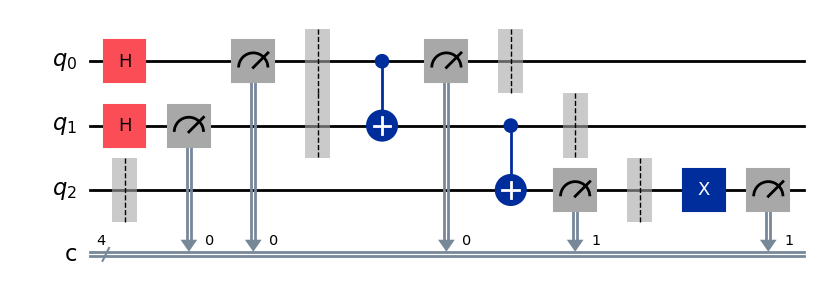

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import matplotlib.pyplot as plt 

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')


def qc_n_qubits(n):
    circuit = QuantumCircuit(qreg_q, creg_c)
    
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[0])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.barrier(qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.cx(qreg_q[1], qreg_q[2])
    circuit.barrier(qreg_q[0])
    circuit.barrier(qreg_q[1])
    circuit.measure(qreg_q[2], creg_c[1])
    circuit.barrier(qreg_q[2])
    circuit.x(qreg_q[2])
    circuit.measure(qreg_q[2], creg_c[1])
    
    return circuit
n = 3
circuit = qc_n_qubits(n)
circuit.draw(output='mpl')


In [3]:
from qiskit_ibm_provider import IBMProvider

# Set up IBM provider
provider = IBMProvider()

# List available backends
available_backends = provider.backends()
print("Available backends:", available_backends)


C:\Users\deepi\AppData\Local\Temp\ipykernel_30116\3864858505.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [4]:
backend = provider.get_backend('ibm_brisbane')

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

# Set up IBM provider
provider = IBMProvider()

# Choose a simulator backend
backend = provider.get_backend('ibm_brisbane')

# Transpile the circuit for the chosen backend
transpiled_circuit = transpile(circuit, backend)

# Run the circuit on the backend
job = backend.run(transpiled_circuit, shots = 1024)

# Get the results
result = job.result()
counts = result.get_counts(circuit)

print("Counts:", counts)

Counts: {'0011': 255, '0000': 240, '0001': 243, '0010': 286}
